# Stationary Series 

일반적으로 time series 데이터를 다룰때 데이터는 staionary 데이터라는 가정이 전제로 시작을 합니다. <br>
시계열 데이터가 stationary일때 다음의 특징을 갖고 있습니다.

1. constant mean 
2. constant variance 
3. 시간에 종속되지 않은 autocovariance 

>  Non-Stationary의 대표적인 예는 random walk가 있습니다.

### 평균은 시간대비 일정해야 한다. 

왼쪽 그래프의 경우 constant mean을 갖고 있지만, 오른쪽 그래프의 경우 시간이 지남에 따라 서로 다른 평균값을 갖습니다.

<img src="images/Mean_nonstationary.png">

### 분산은 시간대비 일정해야 한다. 

오른쪽 그래프의 경우 시간대비 평균값에서 편차가 점점 더 커지는 것을 알수 있습니다. <br>
즉 분산값이 달라진다는 것인데 이렇게 되면 non-stationary series로 정의됩니다.

<img src="images/Var_nonstationary.png">

### Covariance는 시간대비 일정해야 한다. 

오른쪽 그래프의 경우 시간이 지나면서 점점더 좁아지는 것을 알수 있습니다.<br>
즉 처음시간대와 나중시간대의 covariance값이 바뀐다는 뜻이며 이는 non-stationary를 의미합니다.

<img src="images/Cov_nonstationary.png">

# Air Passengers Data

## Loading Data

In [3]:
%pylab inline
import numpy as np
import pandas as pd
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('../../data/time-series/international-airline-passengers.csv', 
                   names=['month', 'passenger'],
                   skiprows=1)

data['month'] = pd.to_datetime(data['month'], format='%Y-%m') # Convert string -> datetime

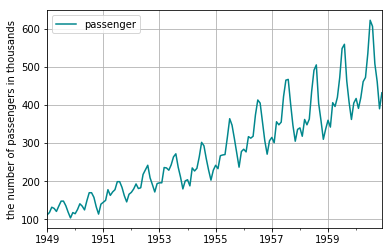

In [5]:
data.plot(x='month', y='passenger', color='#01878D')
ylabel('the number of passengers in thousands')
xlabel('')
legend(loc='upper left')
grid()

위의 그래프만 봐도 전반적으로 증가하는 trend를 갖고 있으며, 주기적인 변동성.. 즉 seasonality를 갖고 있는것을 확인할 수 있습니다.

## Checking Stationality of a Time Series 

### Rolling Statistics

moving average 또는 moving variance를 그래프로 그려봄으로서 시간에 따라서 달라지는 것을 확인해볼수 있습니다.<br>
visual technique입니다.

# References 
 * [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)
 * [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
 * [Rolling Analysis of Time Series](file:///home/anderson/Downloads/9780387279657-c1.pdf)